Author: Pelayo

# Introducción

En este notebook vamos a explorar el dataset de Ames, sobre mercado inmobiliario en Iowa preparado por Dean De Cock, y descrito en el paper *[Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)*.

Vamos a empezar el análisis haciendo un análisis exploratorio detallado del dataset para posteriormente ir aplicando las técnicas de feature engineering vistas en la parte teórica de la clase. El objetivo principal del trabajo que se nos plantea es predecir de forma precisa el precio de venta de las casas.

Recordad el objetivo de la sesión es conocer los principales problemas relacionados con la ingeniería de variables y cómo solventarlos. Es muy importante que entendáis que en el mundo real los dataset tenemos que construirlos buscando fuentes de información internas y externas y hay que preocuparse por la adecuación del dato para resolver el problema y estudiar qué problemas presenta que nos puedan impedir generalizar las conclusiones/predicciones para resolver la cuestión de negocio que estemos tratando.




# Información sobre el dataset

La información básica sobre el dataset se encuentra en los siguientes enlaces:
* [Original dataset](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt)
* [Dataset documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)

De acuerdo a esta documentación hay 2930 observaciones de unas 82 variables (Order y ParcelID no se incluyen). Las propiedades se vendieron en Ames, Iowa desde 2006 al 2020.

Esta primera descripción ya nos hace plantearnos un par de preguntas: Tenemos observaciones repetidas en los datos? Se incluye un identificador de la fecha de venta?

En la sección Special Notes de la documentación se informa de:
" There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."



# Primer vistazo al dataset

Antes de realizar un análisis más riguroso vamos a familiarizarnos con el dataset. No vamos a investigar cada una de las variables todavía sino que vamos a intentar ir desarrollando cierto conocimiento sobre qué variables pueden ser más relevantes para después ir planteando ideas e hipótesis sobre su impacto sobre el precio total de las casas.


## Carga de librerías y de datos

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 24.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=984d442521dc3be919fc3c4f9a916668694359f40381ae85007202c512e89cd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-blmlvsgi/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created whee

In [ ]:
# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# Let's get some data
df_ames = pd.read_csv('https://raw.githubusercontent.com/pelayoarbues/the_valley_public_data/master/feature_engineering/ames_housing/reduced/ames.csv')

## Vistazo a alto nivel
Echemos un ojo a qué forma tiene el dataset

In [ ]:
# How is our data shaping up?
print('Our dataset has {} rows and {} columns.'.format(df_ames.shape[0], df_ames.shape[1]))

Our dataset has 1460 rows and 81 columns.


In [ ]:
# Take a sneak peak at the data
df_ames.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,'RL',65,8450,'Pave','NA','Reg','Lvl','AllPub',...,0,'NA','NA','NA',0,2,2008,'WD','Normal',208500
1,2,20,'RL',80,9600,'Pave','NA','Reg','Lvl','AllPub',...,0,'NA','NA','NA',0,5,2007,'WD','Normal',181500
2,3,60,'RL',68,11250,'Pave','NA','IR1','Lvl','AllPub',...,0,'NA','NA','NA',0,9,2008,'WD','Normal',223500
3,4,70,'RL',60,9550,'Pave','NA','IR1','Lvl','AllPub',...,0,'NA','NA','NA',0,2,2006,'WD','Abnorml',140000
4,5,60,'RL',84,14260,'Pave','NA','IR1','Lvl','AllPub',...,0,'NA','NA','NA',0,12,2008,'WD','Normal',250000


Hagamos una descriptiva rápida para hacernos una idea sobre el dataset

In [ ]:
 from pandas_profiling import ProfileReport

 profile = ProfileReport(df_ames
      #,html={"style": {"full_width": True}}
 )

profile.to_file(output_file='Ames.html')



<ipython-input-6-853f43ac41e2>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

# Particion (resampling, splitting)

Vamos a dividir el dataset entre train y test. Habitualmente como habréis visto en otras sesiones se puede trabajar con otro split de validación sobre el que se calibran los hiperparámetros. En caso de no tener mucha muestra se puede trabajar con train y test y hacer Cross-validation sobre train para no deshacernos de demasiados datos.

En este notebook vamos a centrarnos en la ingeniería de variables y en las técnicas que se utilizan. Por lo tanto de vez en cuando calcularemos los errores que cometemos en train pero para no complicar demasiado el código únicamente calcularemos los errores sobre test en los últimos ejercicios.

In [ ]:
# We remove properties > 4000 ft following documentation advice
df_ames.drop(df_ames[df_ames.GrLivArea >= 4000].index, inplace=True)

#First we Define dependent variable
y = df_ames['SalePrice']
df_ames.drop('SalePrice', axis=1, inplace=True) #Removes dependent variable from dataset
df_ames.drop('Id', axis=1, inplace=True) #removes ID from dataset




In [ ]:
# Split data intro train and validation sets
X_train, X_test, y_train, y_test =  train_test_split(df_ames, #Defines the dataset without dependent variable
                     y, #defines dependent variable
                     test_size=0.3, #defines test size in proportion
                     random_state=42) #sets seed
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

# Feature Engineering

Vamos a entrar en materia con lo que estamos viendo de ingeniería de variables. Para facilitar el análisis vamos a coger subconjuntos de variables y tratarlos de forma más o menos independiente

## Variables Numéricas

In [ ]:
#Check numeric variables
num_features = X_train.select_dtypes(include=['int64','float64']).columns

#Seleccionamos unas cuantas variables numéricas, en num_features las tendríamos todas
num_features_selected = ['TotalBsmtSF', 'GrLivArea', 'FullBath', 'LotArea', 'YearBuilt']


In [ ]:
# Grid of distribution plots of selected numerical features
f = pd.melt(X_train, value_vars=sorted(num_features_selected)) #melt: Unpivot a DataFrame from wide to long format
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False) #FacetGrid: multiple plots in a grid
g = g.map(sns.distplot, 'value') #Apply a plotting function to each facet’s subset of the data.

In [ ]:
print(f)

          variable      value
0        ExterQual       'Gd'
1        ExterQual       'TA'
2        ExterQual       'Gd'
3        ExterQual       'TA'
4        ExterQual       'Gd'
...            ...        ...
5819  Neighborhood  'Gilbert'
5820  Neighborhood   'NWAmes'
5821  Neighborhood  'Crawfor'
5822  Neighborhood    'NAmes'
5823  Neighborhood  'Edwards'

[5824 rows x 2 columns]


### Escalado de variables




#### Normalización de los datos


<ipython-input-68-3360ca152fbe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[variable_of_interest])


Min value of variable: 438
Max value of variable: 3627
Mean of variable: 1509.1756624141315
standard deviation of variable: 489.14625270846216


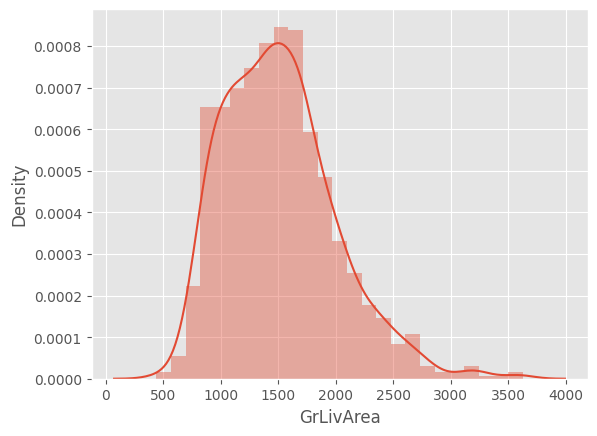

In [ ]:
variable_of_interest = 'GrLivArea' #we define a variable for plotting

#Let's plot de variable of interest and compute some statistics
ax = sns.distplot(X_train[variable_of_interest])
print('Min value of variable: ' + str(min(X_train[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train[variable_of_interest])))
print('Mean of variable: ' + str(X_train[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train[variable_of_interest].std()))

Vamos a trabajar la normalización de las variables *num_features_selected*

In [ ]:
from sklearn.preprocessing import MinMaxScaler #In a working notebook this imports
#should go in the first cell, we are importing in the middle of the notebook for
#educational purposes!

# define min max scaler
scaler = MinMaxScaler()

#Scale the variables and save them to X_scaled
X_scaled = scaler.fit_transform(X_train[num_features_selected]) #Scales and converts to numpy array
#Let's put it back to a pandas dataframe
X_train_scaled = pd.DataFrame(X_scaled,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)


PREGUNTA!

- Cuál va a ser el valor mínimo de las variables transformadas?
- Y el máximo?
- Y la media y desviación?

<ipython-input-70-906a90fa1b6e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train_scaled[variable_of_interest])


Min value of variable: 0.0
Max value of variable: 0.9999999999999999
Mean of variable: 0.3358970405814147
standard deviation of variable: 0.15338546651253124


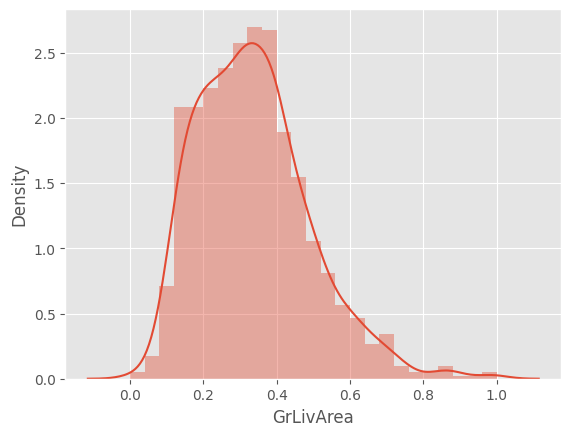

In [ ]:
#Let's plot the original value for GrLivArea
ax = sns.distplot(X_train_scaled[variable_of_interest])
print('Min value of variable: ' + str(min(X_train_scaled[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train_scaled[variable_of_interest])))
print('Mean of variable: ' + str(X_train_scaled[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train_scaled[variable_of_interest].std()))

Para hacerlo más divertido vamos a hacer un modelo muy sencillo con estas variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#Instance Linear regression
model = LinearRegression()

# Fit model with original features

reg = model.fit(X_train[num_features_selected], y_train)

# fit model with scaled features
reg_scaled = model.fit(X_train_scaled, y_train)



In [ ]:
from sklearn.metrics import mean_absolute_error

#Evaluate model

#First we define a function -- Note that we should create a library with util
# functions and import it at the beginning of the notebook

def compute_mae(X, y, model):
    '''returns mae for already fit model.'''
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)

    return mae


In [ ]:
mae_reg = compute_mae(X_train[num_features_selected], y_train, reg)

print('Train MAE (raw data): ' + str(mae_reg))

mae_reg_scaled = compute_mae(X_train_scaled, y_train, reg_scaled)

print('Train MAE (Scaled data): ' + str(mae_reg_scaled))


Train MAE (raw data): 1921589034.9549177
Train MAE (Scaled data): 26387.271088103018


Recordad que estamos haciendo ingeniería de variables y transformándolas pero para estimar realmente bien el impacto de este trabajo sobre nuestro modelo deberíamos hacerlo sobre un split de validación o usando cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# define the evaluation procedure
cv = KFold(n_splits = 5, shuffle = True, random_state = 100)
# evaluate the model
m_scores_reg = cross_val_score(model, #algorithm to be used (defined in a previous cell)
                               X_train[num_features_selected], # input data with features
                               y_train, # target
                               scoring='neg_mean_absolute_error', #evaluation metric (sklearn maximises objective functions)
                               cv=cv, # Cross validation procedure (defined above)
                               n_jobs=-1) #number of processors to be used, -1 = all available



In [ ]:
m_scores_reg_scaled = cross_val_score(model,
                                      X_train_scaled,
                                      y_train,
                                      scoring='neg_mean_absolute_error',
                                      cv=cv,
                                      n_jobs=-1)


In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Scaled): %.3f (%.3f)' % (np.mean(m_scores_reg_scaled) * (-1), np.std(m_scores_reg_scaled)))



CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Scaled): 26618.316 (1357.147)


#### Estandarización de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


# define standard scaler
scaler = StandardScaler()

#Scale the variables and save them to X_scaled
X_standard = scaler.fit_transform(X_train[num_features_selected]) #Scales and converts to numpy array
#Let's put it back to a pandas dataframe
X_train_standard = pd.DataFrame(X_standard,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)




PREGUNTA!

- Cuál va a ser el valor mínimo de las variables transformadas?
- Y el máximo?
- Y la media y desviación?

<ipython-input-79-bc6474fc21b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train_standard[variable_of_interest])


Min value of variable: -2.1909636331711297
Max value of variable: 4.33176020321255
Mean of variable: 7.234426774790028e-17
standard deviation of variable: 1.0004910385761183


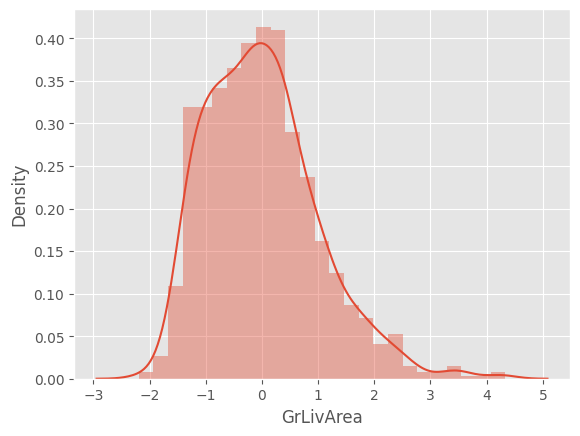

In [ ]:
#Let's plot the original value for GrLivArea
ax = sns.distplot(X_train_standard[variable_of_interest])
print('Min value of variable: ' + str(min(X_train_standard[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train_standard[variable_of_interest])))
print('Mean of variable: ' + str(X_train_standard[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train_standard[variable_of_interest].std()))

In [ ]:
# evaluate the model with standardized variables
m_scores_reg_standard = cross_val_score(model,
                                        X_train_standard,
                                        y_train,
                                        scoring='neg_mean_absolute_error',
                                        cv=cv,
                                        n_jobs=-1)

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Standard): %.3f (%.3f)' % (np.mean(m_scores_reg_standard) * (-1), np.std(m_scores_reg_scaled)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Standard): 26618.316 (1357.147)


### Distribución de datos: Haciendo distribuciones más Gaussianas


#### Power transforms

**Skewness y Kurtosis**

Skewness - Asimetría:

Si la asimetría = 0, los datos son perfectamente simétricos. Pero una asimetría de exactamente cero es bastante improbable en los datos del mundo real, así que ¿cómo se puede interpretar el número de asimetría?:

- Si la asimetría es inferior a -1 o superior a +1, la distribución está muy sesgada.
- Si la asimetría está entre -1 y -½ o entre +½ y +1, la distribución es moderadamente asimétrica.
- Si la asimetría está entre -½ y +½, la distribución es aproximadamente simétrica.


**Kurtosis:**

La norma de referencia es una distribución normal, que tiene una curtosis de 3. En señal de ello, a menudo se presenta el exceso de curtosis: el exceso de curtosis es simplemente curtosis-3.

- Una distribución normal tiene una curtosis exactamente 3 (exceso de curtosis exactamente 0). Cualquier distribución con curtosis ≈3 (exceso ≈0) se llama mesocúrtica.
- Una distribución con curtosis <3 (exceso de curtosis <0) se denomina platicúrtica. En comparación con una distribución normal, sus colas son más cortas y delgadas, y a menudo su pico central es más bajo y más amplio.
- Una distribución con curtosis >3 (exceso de curtosis >0) se denomina leptocúrtica. En comparación con una distribución normal, sus colas son más largas y gordas, y a menudo su pico central es más alto y agudo.


Más info en este enlace: http://brownmath.com/stat/shape.htm


<ipython-input-82-07862c788146>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[variable_of_interest])


Min value of variable: 438
Max value of variable: 3627
Mean of variable: 1509.1756624141315
standard deviation of variable: 489.14625270846216
Skew: 0.8127343312279628
Kurtosis: 1.0207901921517708


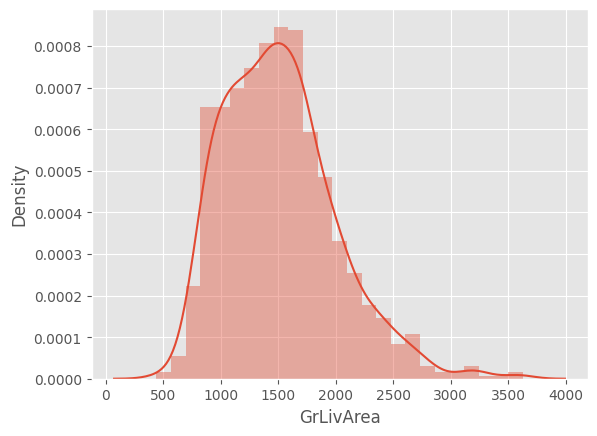

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

ax = sns.distplot(X_train[variable_of_interest])

variable_of_interest = 'GrLivArea'

print('Min value of variable: ' + str(min(X_train[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train[variable_of_interest])))
print('Mean of variable: ' + str(X_train[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train[variable_of_interest].std()))
print('Skew: ' + str(skew(X_train[variable_of_interest])))
print('Kurtosis: ' + str(kurtosis(X_train[variable_of_interest])))



Además de hacer una inspección visual sobre la forma de nuestra distribución podemos hacer algo un poco más sofisticado como construir una test de hipótesis para contrastar si la distribución es normal o no.

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest

# Shapiro normality test
# If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
# If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.
# stat, p = shapiro(X_train_power[variable_of_interest])
stat, p = shapiro(X_train[variable_of_interest])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Shapiro test')
else:
 print('Probably not Gaussian (reject H0) according to Shapiro test')

# Kolmogorov-Smirnov test for Normality
#  Performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit.
#  The one-sample test performs a test of the distribution F(x) of an observed random variable
#  against a given distribution G(x) (i.e. a normal distribution).
stat, p = kstest(X_train[variable_of_interest], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Kolmogorov-Smirnov test')
else:
 print('Probably not Gaussian (reject H0) according to ShapKolmogorov-Smirnoviro test')

Statistics=0.962, p=0.000
Probably not Gaussian (reject H0) according to Shapiro test
Statistics=1.000, p=0.000
Probably not Gaussian (reject H0) according to ShapKolmogorov-Smirnoviro test


Una vez que ha quedado claro que nuestra variable que estamos estudiando no es Gaussiana vamos a procecer a aplicarle una transformación que la convierta en una distribución más parecida a una normal

In [ ]:
from sklearn.preprocessing import PowerTransformer

p_method = 'yeo-johnson' #try it with 'box-cox'
power_transform = PowerTransformer(method=p_method)
X_power = power_transform.fit_transform(X_train[num_features_selected])

#Let's put it back to a pandas dataframe
X_train_power = pd.DataFrame(X_power,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)

Vamos a ver cómo ha quedado visualmente tras aplicarle la transformación

<ipython-input-85-0fd4d3c67230>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train_power[variable_of_interest])


Min value of variable: -3.4687023517665185
Max value of variable: 3.014965056192395
Mean of variable: -7.861991507060972e-16
standard deviation of variable: 1.0004910385761183
Skew: -0.0022758370005735848
Kurtosis: -0.19153816337858398


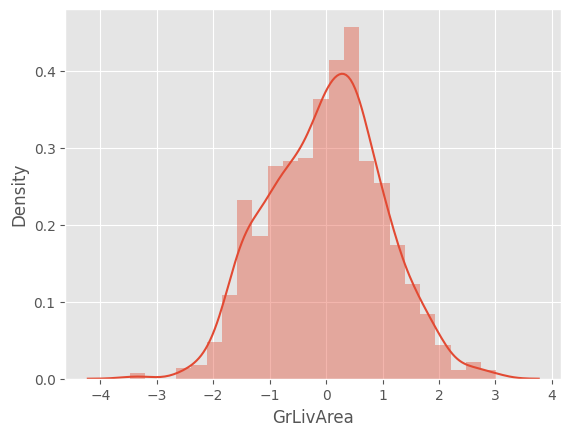

In [ ]:

ax = sns.distplot(X_train_power[variable_of_interest])

print('Min value of variable: ' + str(min(X_train_power[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train_power[variable_of_interest])))
print('Mean of variable: ' + str(X_train_power[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train_power[variable_of_interest].std()))
print('Skew: ' + str(skew(X_train_power[variable_of_interest])))
print('Kurtosis: ' + str(kurtosis(X_train_power[variable_of_interest])))



Y ahora vamos a ver qué nos dicen los test de normalidad

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest

# Shapiro normality test
# If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
# If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.
stat, p = shapiro(X_train_power[variable_of_interest])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Shapiro test')
else:
 print('Probably not Gaussian (reject H0) according to Shapiro test')

# Kolmogorov-Smirnov test for Normality
#  Performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit.
#  The one-sample test performs a test of the distribution F(x) of an observed random variable
#  against a given distribution G(x) (i.e. a normal distribution).
stat, p = kstest(X_train_power[variable_of_interest], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Kolmogorov-Smirnov test')
else:
 print('Probably not Gaussian (reject H0) according to ShapKolmogorov-Smirnoviro test')

Statistics=0.997, p=0.023
Probably not Gaussian (reject H0) according to Shapiro test
Statistics=0.028, p=0.379
Probably Gaussian (fail to reject H0) according to Kolmogorov-Smirnov test


Vamos a ajustar (entrenar) un modelo con los datos transformados

In [ ]:
# fit model with Power Transformed features
reg_power = model.fit(X_train_power, y_train)


In [ ]:
#Print previously computed MAE for unscaled data
print('Train MAE (raw data): ' + str(mae_reg))


Train MAE (raw data): 1921589034.9549177


In [ ]:
mae_reg_power = compute_mae(X_train_power, y_train, reg_power)

print('Train MAE with Power Transformed Data: ' + str(mae_reg_power))


Train MAE with Power Transformed Data: 27869.889602634626


In [ ]:
# evaluate the model with power transformed variables
m_scores_reg_power = cross_val_score(model, X_train_power, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Power Transform): %.3f (%.3f)' % (np.mean(m_scores_reg_power) * (-1), np.std(m_scores_reg_power)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Power Transform): 28071.523 (1538.395)


#### Quantile transforms

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantile_transform = QuantileTransformer(output_distribution='normal')
X_quantile = quantile_transform.fit_transform(X_train[num_features_selected])

#Let's put it back to a pandas dataframe
X_train_quantile = pd.DataFrame(X_quantile,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)

Vamos a visualizar la distribución de la variable transformada a través de la función cuantílica

<ipython-input-93-0d5dde8905da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train_power[variable_of_interest])


Min value of variable: -5.199337582605575
Max value of variable: 5.19933758270342
Mean of variable: -5.83338455332154e-06
standard deviation of variable: 1.0204838670982934
Skew: -0.00042730109043164036
Kurtosis: 0.9527567305994427


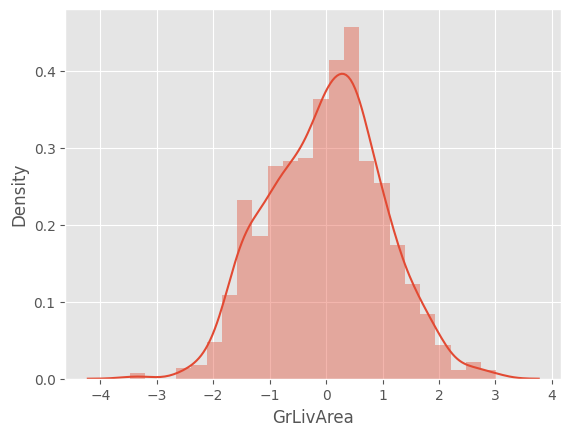

In [ ]:

ax = sns.distplot(X_train_power[variable_of_interest])

print('Min value of variable: ' + str(min(X_train_quantile[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train_quantile[variable_of_interest])))
print('Mean of variable: ' + str(X_train_quantile[variable_of_interest].mean()))
print('standard deviation of variable: ' + str(X_train_quantile[variable_of_interest].std()))
print('Skew: ' + str(skew(X_train_quantile[variable_of_interest])))
print('Kurtosis: ' + str(kurtosis(X_train_quantile[variable_of_interest])))



In [ ]:
# Shapiro normality test
# If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
# If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.
stat, p = shapiro(X_train_quantile[variable_of_interest])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Shapiro test')
else:
 print('Probably not Gaussian (reject H0) according to Shapiro test')

# Kolmogorov-Smirnov test for Normality
#  Performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit.
#  The one-sample test performs a test of the distribution F(x) of an observed random variable
#  against a given distribution G(x) (i.e. a normal distribution).
stat, p = kstest(X_train_quantile[variable_of_interest], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Probably Gaussian (fail to reject H0) according to Kolmogorov-Smirnov test')
else:
 print('Probably not Gaussian (reject H0) according to ShapKolmogorov-Smirnoviro test')

Statistics=0.994, p=0.001
Probably not Gaussian (reject H0) according to Shapiro test
Statistics=0.007, p=1.000
Probably Gaussian (fail to reject H0) according to Kolmogorov-Smirnov test


In [ ]:
# fit model with scaled features
reg_quantile = model.fit(X_train_quantile, y_train)

In [ ]:
#Print previously computed MAE for unscaled data
print('Train MAE (raw data): ' + str(mae_reg))


Train MAE (raw data): 1921589034.9549177


In [ ]:
mae_reg_quantile = compute_mae(X_train_quantile, y_train, reg_quantile)

print('Train MAE with Quantile Transformed Data: ' + str(mae_reg_quantile))


Train MAE with Quantile Transformed Data: 28061.50541923433


In [ ]:
# evaluate the model with quantile transformed variables
m_scores_reg_quantile = cross_val_score(model, X_train_quantile, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Quantile Transform): %.3f (%.3f)' % (np.mean(m_scores_reg_quantile) * (-1), np.std(m_scores_reg_quantile)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Quantile Transform): 28336.075 (1799.789)


De momento sólo hemos trabajado con las variables predictoras, pero... **sabiais que también es importante para algunos modelos transformar la variable a predecir?**



<ipython-input-100-3d571954435e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train)


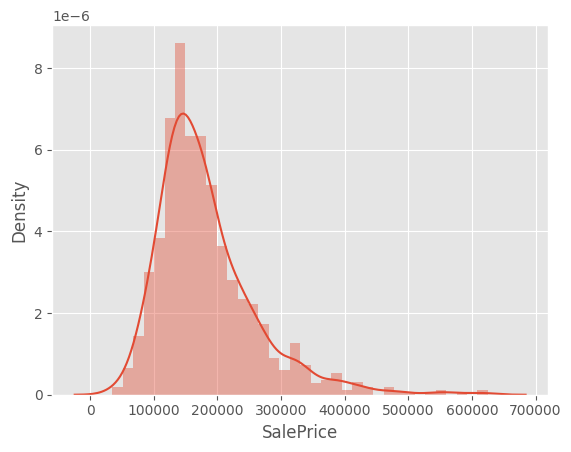

In [ ]:
#let's take a look at the dependent variable
ax = sns.distplot(y_train)


Hemos visto que una de las opciones más comunes de usar una transformada de potencia es tomar el logaritmo (aunque es posible que no sea la forma más óptima). Vamos a tomar el log de la variable target

<ipython-input-101-971c8a5d5971>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log(y_train), axlabel = 'log(SalePrice)') # we take the log of the dependent variable


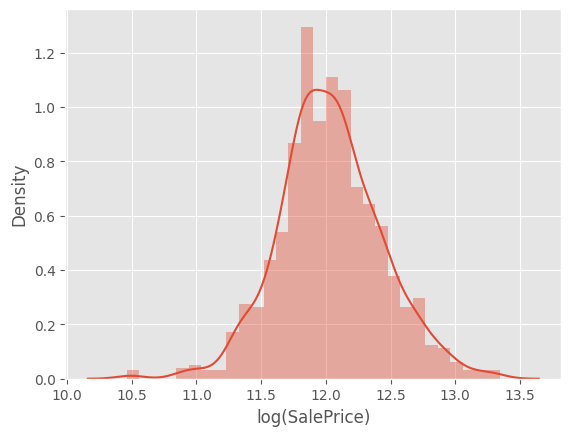

In [ ]:
ax = sns.distplot(np.log(y_train), axlabel = 'log(SalePrice)') # we take the log of the dependent variable

In [ ]:
# evaluate the model with power transformed variables and logged target
m_scores_reg_power_target = cross_val_score(model,
                                            X_train_power,
                                            np.log(y_train),
                                            scoring='neg_mean_absolute_error',
                                            cv=cv,
                                            n_jobs=-1)

In [ ]:
print('CV Train MAE (Power Transform + log(y)): %.3f (%.3f)' % (np.mean(m_scores_reg_power_target) * (-1), np.std(m_scores_reg_power_target)))

CV Train MAE (Power Transform + log(y)): 0.127 (0.008)


Como hemos transformando la variable dependiente nuestros errores también se han transformado, vamos a hacer un proceso más robusto utilizando Pipelines de sklearn y la función

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

# prepare the model with input scaling
pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', model)])
# prepare the model with target scaling
model_pipeline = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores_pipeline = cross_val_score(model_pipeline, X_train[num_features_selected], y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Power Transform with ): %.3f (%.3f)' % (np.mean(scores_pipeline) * (-1), np.std(scores_pipeline)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Power Transform with ): 22870.804 (3014.873)


### Discretización de variables (Binning)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=10, #10 buckets
                         encode='ordinal', #ordinal encoding
                         strategy='uniform') # ‘uniform’, ‘quantile’, or ‘kmeans’

X_bins = kbins.fit_transform(X_train[num_features_selected])
#Let's put it back to a pandas dataframe
X_train_bins = pd.DataFrame(X_bins,
                              index=X_train[num_features_selected].index,
                              columns=X_train[num_features_selected].columns)


Vamos a pintar ahora la variable, como ha pasado de numérica (continua) a discreta la podemos pintar con un histograma

Min value of variable: 0.0
Max value of variable: 9.0


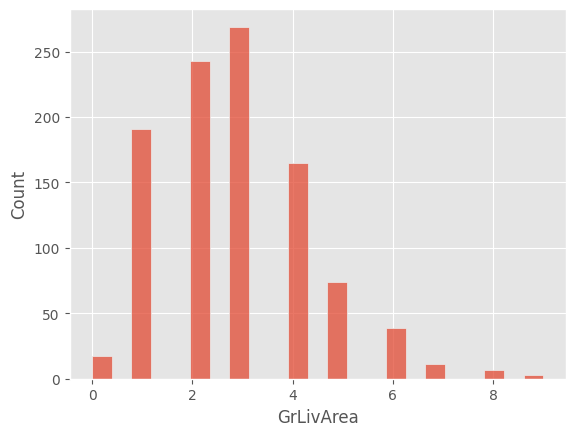

In [ ]:
ax = sns.histplot(X_train_bins[variable_of_interest])

print('Min value of variable: ' + str(min(X_train_bins[variable_of_interest])))
print('Max value of variable: ' + str(max(X_train_bins[variable_of_interest])))


In [ ]:
# # fit model with scaled features
reg_bins = model.fit(X_train_bins, y_train)
# #Print previously computed MAE for unscaled data
print('Train MAE (raw data): ' + str(mae_reg))
mae_reg_bins = compute_mae(X_train_bins, y_train, reg_bins)

print('Train MAE with Binned Data: ' + str(mae_reg_bins))


Train MAE (raw data): 1921589034.9549177
Train MAE with Binned Data: 27762.815429467442


In [ ]:
# evaluate the model with binned variables
m_scores_bins = cross_val_score(model,
                                X_train_bins,
                                y_train,
                                scoring='neg_mean_absolute_error',
                                cv=cv,
                                n_jobs=-1)

In [ ]:
print('CV Train MAE (Bins): %.3f (%.3f)' % (np.mean(m_scores_bins) * (-1), np.std(m_scores_bins)))

CV Train MAE (Bins): 27960.697 (2973.229)


Como hemos visto en la teoría al discretizar las variables podemos perder información causando dificultades al algoritmo para aprender las relaciones. No obstante recordad que sólo estamos viendo el efecto sobre el split de train y deberíamos hacerlo sobre un conjunto de validación.

### Polynomial Features

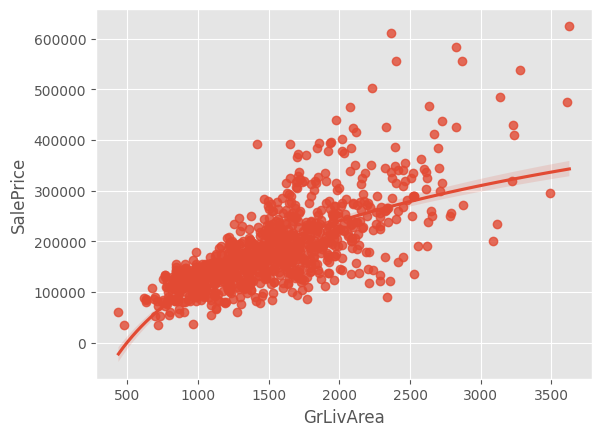

In [ ]:
ax = sns.regplot(x="GrLivArea", y=y_train, data=X_train, logx=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 2
polynomial = PolynomialFeatures(degree=poly_degree)

X_polynomial = polynomial.fit_transform(X_train[num_features_selected])


#Let's put it back to a pandas dataframe
X_train_polynomial = pd.DataFrame(X_polynomial,
                              index=X_train[num_features_selected].index,
                              columns=polynomial.get_feature_names_out(X_train[num_features_selected].columns))
print(X_train_polynomial)
print(list(X_train_polynomial.columns))



        1  TotalBsmtSF  GrLivArea  FullBath  LotArea  YearBuilt  \
464   1.0       1040.0     1040.0       2.0   8430.0     1978.0   
471   1.0        808.0     1969.0       2.0  11952.0     1977.0   
1332  1.0        816.0      816.0       1.0   8877.0     1938.0   
435   1.0        799.0     1661.0       2.0  10667.0     1996.0   
1209  1.0       1660.0     1660.0       2.0  10182.0     2006.0   
...   ...          ...        ...       ...      ...        ...   
1097  1.0       1074.0     1088.0       1.0   3696.0     1986.0   
1132  1.0       1008.0     2210.0       2.0   9900.0     1880.0   
1297  1.0        547.0     1072.0       2.0   3675.0     2005.0   
862   1.0       1040.0     1097.0       2.0   9672.0     1984.0   
1128  1.0        847.0     1959.0       2.0  11796.0     2004.0   

      TotalBsmtSF^2  TotalBsmtSF GrLivArea  TotalBsmtSF FullBath  \
464       1081600.0              1081600.0                2080.0   
471        652864.0              1590952.0                1

In [ ]:
# # fit model with selected features
reg_polynomial = model.fit(X_train_polynomial, y_train)

mae_reg_polynomial= compute_mae(X_train_polynomial, y_train, reg_polynomial)

print('Train MAE with polynomial Data: ' + str(mae_reg_polynomial))

Train MAE with polynomial Data: 22357.273109367772


In [ ]:
# evaluate the model with polynomial transformed variables
m_scores_reg_polynomial = cross_val_score(model,
                                          X_train_polynomial,
                                          y_train,
                                          scoring='neg_mean_absolute_error',
                                          cv=cv,
                                          n_jobs=-1)

PREGUNTA!!!:
 Deberíamos estandarizar, escalar o transformar las variables?

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (polynomial Transform): %.3f (%.3f)' % (np.mean(m_scores_reg_polynomial) * (-1), np.std(m_scores_reg_polynomial)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (polynomial Transform): 23093.599 (2247.644)


In [ ]:
# define the modeling pipeline
trans = PolynomialFeatures(degree=poly_degree)
scaler = StandardScaler()
pipeline = Pipeline([('t',trans), ('s',scaler),('m',model)])

# evaluate the model
m_scores_reg_polynomial_scaled = cross_val_score(pipeline, X_train[num_features_selected], y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# summarize the result
print('CV Train MAE (polynomial Transform & scaled): %.3f (%.3f)' % (np.mean(m_scores_reg_polynomial_scaled) * (-1), np.std(m_scores_reg_polynomial_scaled)))


CV Train MAE (polynomial Transform & scaled): 23093.599 (2247.644)


PREGUNTA: Estamos haciendo mucho trabajo mecánico de transformación de los datos, pero aquí también cabe la posibilidad de que nos preguntemos si podemos crear ratios entre variables que tengan sentido. Se os ocurre alguna?

## Variables categóricas

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


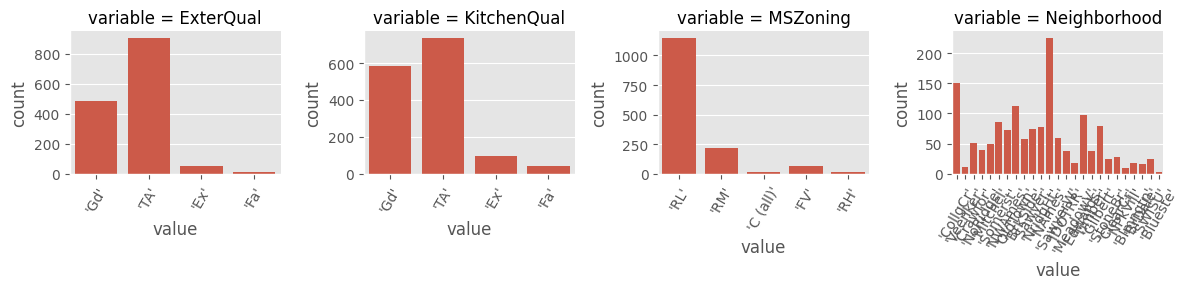

In [ ]:
categorical_features = ['Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual']

# Count plots of categorical features
f = pd.melt(df_ames, value_vars=sorted(categorical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


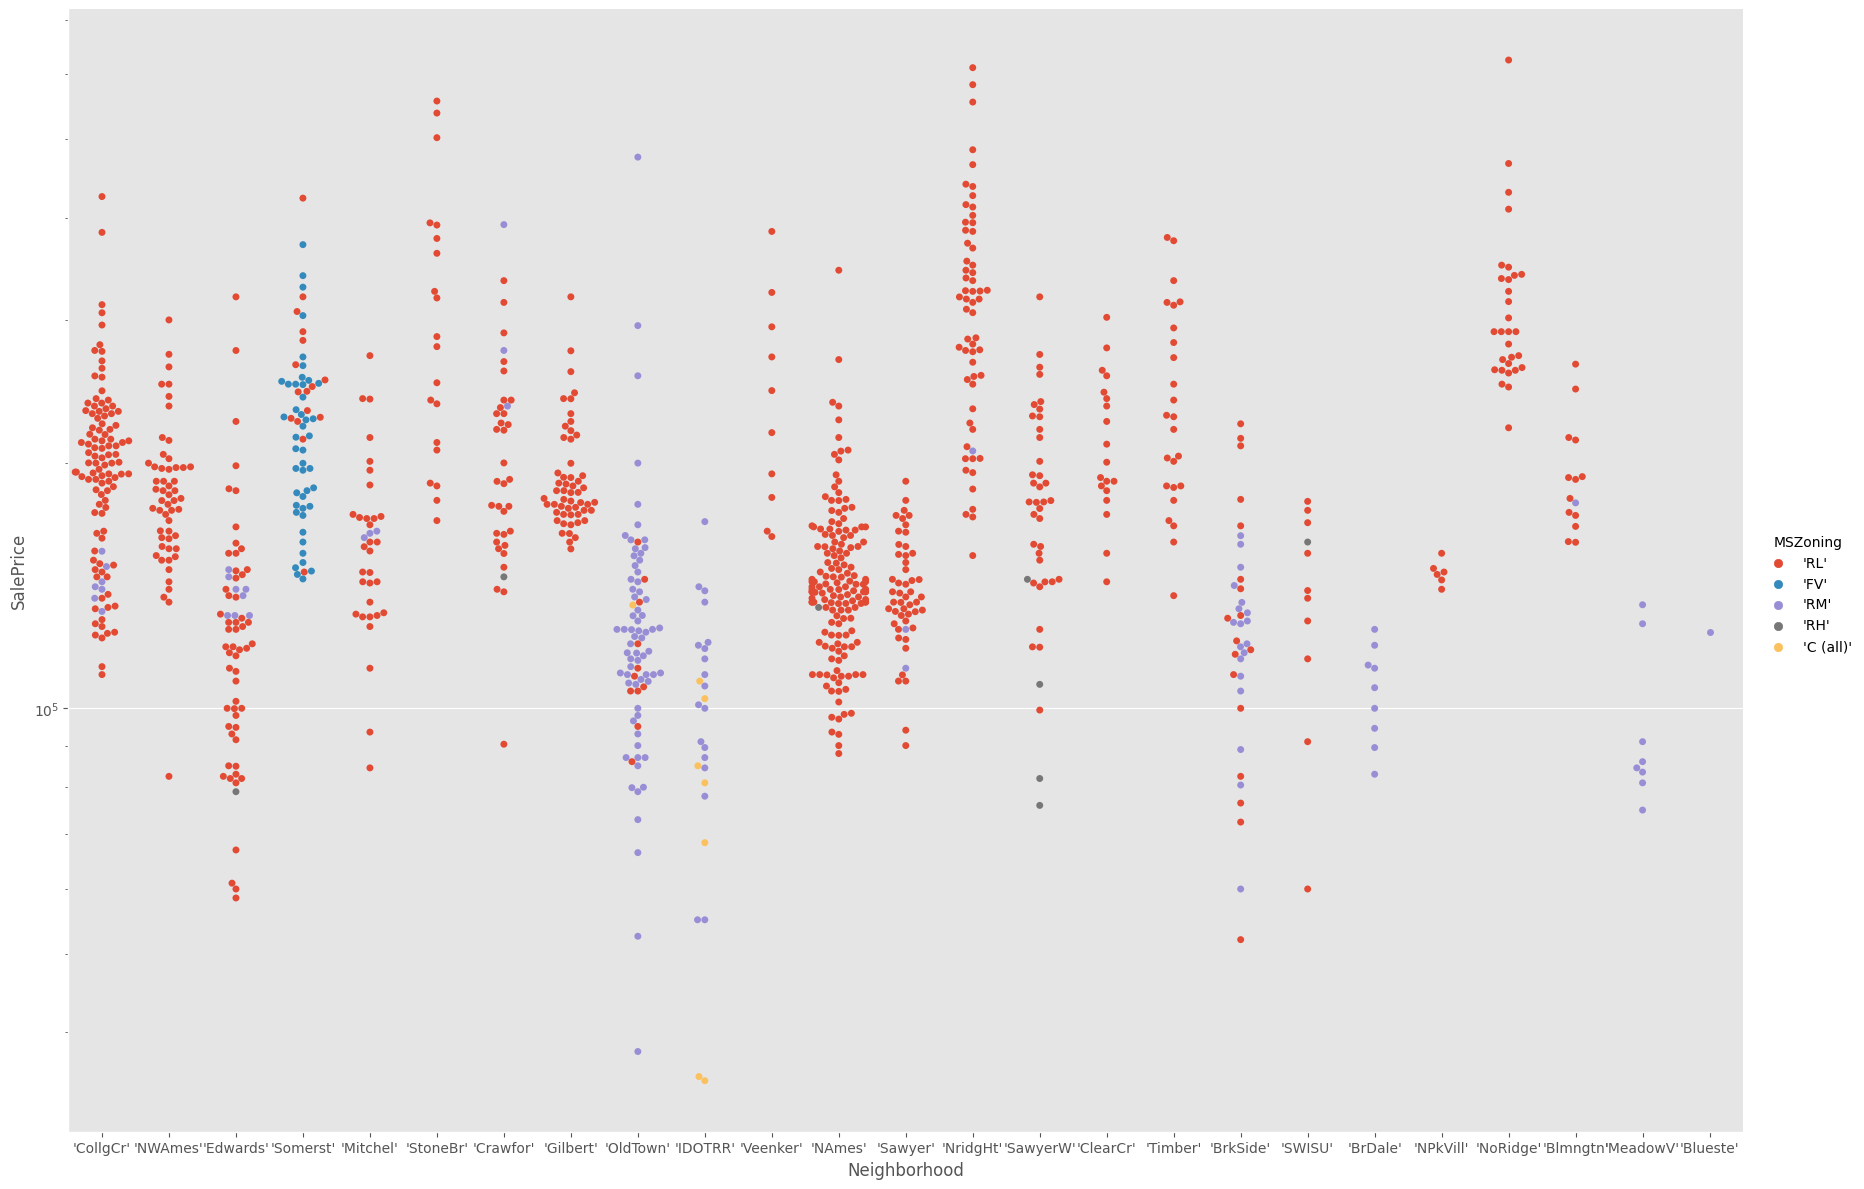

In [ ]:
# Swarming Factorplot FTW
fig = sns.catplot(x='Neighborhood', y=y_train, hue='MSZoning', data=X_train, kind='swarm', height=12, aspect=1.5)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

Vamos a tratar de hacer un modelo metiendo los datos numéricos y las variables en ordinal_features.

In [ ]:
ordinal_features = ['ExterQual', 'KitchenQual'] #select a couple of variables for demostration purposes

X_train_ordinal = pd.concat([X_train_scaled,
                            X_train[ordinal_features]], axis = 1)

print(X_train_ordinal)

      TotalBsmtSF  GrLivArea  FullBath   LotArea  YearBuilt ExterQual  \
464      0.325000   0.188774  0.666667  0.033326   0.768116      'TA'   
471      0.252500   0.480088  0.666667  0.049788   0.760870      'TA'   
1332     0.255000   0.118532  0.333333  0.035416   0.478261      'TA'   
435      0.249688   0.383506  0.666667  0.043782   0.898551      'Gd'   
1209     0.518750   0.383192  0.666667  0.041515   0.971014      'Gd'   
...           ...        ...       ...       ...        ...       ...   
1097     0.335625   0.203826  0.333333  0.011199   0.826087      'Gd'   
1132     0.315000   0.555660  0.666667  0.040197   0.057971      'TA'   
1297     0.170937   0.198808  0.666667  0.011101   0.963768      'TA'   
862      0.325000   0.206648  0.666667  0.039132   0.811594      'TA'   
1128     0.264688   0.476952  0.666667  0.049059   0.956522      'Gd'   

     KitchenQual  
464         'TA'  
471         'TA'  
1332        'TA'  
435         'Gd'  
1209        'Gd'  
...      

In [ ]:
# fit model with categorical features
reg_ordinal = model.fit(X_train_ordinal, y_train)

ValueError: could not convert string to float: "'TA'"

### Ordinal Encoding

Vamos a ver primero un ejemplo muy sencillo donde tenemos variables categóricas que siguen un orden y vamos a ver cómo codificarlas con OrdinalEncoder definiendo el orden de las categorías:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
categorical_df = pd.DataFrame({'my_id': ['101', '102', '103', '104'],
                               'temp': ['hot', 'warm', 'cool', 'cold'],
                               'place': ['third', 'second', 'first', 'second']})

# In the 'temp' column, I want 'cold' to be 0, 'cool' to be 1, 'warm' to be 2, and 'hot' to be 3
# In the 'place' column, I want 'first' to be 0, 'second' to be 1, and 'third' to be 2
temp_categories = ['cold', 'cool', 'warm', 'hot']
place_categories = ['first', 'second', 'third']

# Now, when you instantiate the encoder, both of these lists go in one big categories list:
encoder = OrdinalEncoder(categories=[temp_categories, place_categories])

encoder.fit_transform(categorical_df[['temp', 'place']])

array([[3., 2.],
       [2., 1.],
       [1., 0.],
       [0., 1.]])

Vamos a enfocarnos en la variable 'ExterQual' que recoge la calidad de los materiales exteriores de la casa

In [ ]:


quality_order = ["'Po'","'Fa'","'TA'","'Gd'","'Ex'"]
# # define ordinal encoding
encoder = OrdinalEncoder(categories= [quality_order, quality_order])

# #transform data
X_ordinal = encoder.fit_transform(X_train_ordinal[ordinal_features])
# #Let's put it back to a pandas dataframe
X_ordinal = pd.DataFrame(X_ordinal,
                              index=X_train_ordinal[ordinal_features].index,
                              columns=X_train_ordinal[ordinal_features].columns)

X_train_ordinal = pd.concat([X_train_scaled,
                            X_ordinal], axis = 1)



In [ ]:
# # fit model with ordinal encoded features
# reg_ordinal = model.fit(X_train_ordinal, y_train)
# mae_reg_ordinal= compute_mae(X_train_ordinal, y_train, reg_ordinal)

# print('Train MAE with Ordinal Encoded Data: ' + str(mae_reg_ordinal))

In [ ]:
# evaluate the model with polynomial transformed variables
m_scores_reg_ordinal = cross_val_score(model, X_train_ordinal, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (Ordinal Encoding): %.3f (%.3f)' % (np.mean(m_scores_reg_ordinal) * (-1), np.std(m_scores_reg_ordinal)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (Ordinal Encoding): 23971.977 (3071.325)


### One Hot Encoding - Dummy Variables

Para ver cómo funciona One Hot Encoding (o su alternativa menos redundante Dummy variables) vamos a escoger un par de variables categóricas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Neighborhood', 'MSZoning']

X_train_categorical = pd.concat([X_train_scaled,
                            X_train[categorical_features]],
                            axis = 1)  #concat on columns
axis = 1
encoder = OneHotEncoder(sparse=False, #This prevents from creating sparse matrix
                        drop='first') #This removes baseline variable

onehot = encoder.fit_transform(X_train_categorical[categorical_features])

#Create a Pandas DataFrame of the hot encoded columns
# we pass categorical_features to get_feature_names to obtain prefixes
ohe_df = pd.DataFrame(onehot,
                      columns=encoder.get_feature_names_out(categorical_features))
#Note that we set index from the original dataframe
ohe_df.set_index(X_train_categorical.index, inplace = True)

# #concat with original data

X_train_ohe = pd.concat([X_train_categorical,
                         ohe_df],
                        axis = 1)

print(X_train_ohe.head())

# # drop original categorical variables
X_train_ohe = X_train_ohe.drop(categorical_features, axis=1)



      TotalBsmtSF  GrLivArea  FullBath   LotArea  YearBuilt Neighborhood  \
464      0.325000   0.188774  0.666667  0.033326   0.768116    'CollgCr'   
471      0.252500   0.480088  0.666667  0.049788   0.760870     'NWAmes'   
1332     0.255000   0.118532  0.333333  0.035416   0.478261    'Edwards'   
435      0.249688   0.383506  0.666667  0.043782   0.898551    'CollgCr'   
1209     0.518750   0.383192  0.666667  0.041515   0.971014    'Somerst'   

     MSZoning  Neighborhood_'Blueste'  Neighborhood_'BrDale'  \
464      'RL'                     0.0                    0.0   
471      'RL'                     0.0                    0.0   
1332     'RL'                     0.0                    0.0   
435      'RL'                     0.0                    0.0   
1209     'RL'                     0.0                    0.0   

      Neighborhood_'BrkSide'  ...  Neighborhood_'Sawyer'  \
464                      0.0  ...                    0.0   
471                      0.0  ...     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# # fit model with selected features
#model = LinearRegression(fit_intercept=True)
model = KNeighborsRegressor()
reg_ohe = model.fit(X_train_ohe, y_train)

mae_reg_ohe= compute_mae(X_train_ohe, y_train, reg_ohe)

print('Train MAE with One Hot Encoding Data: ' + str(mae_reg_ohe))

Train MAE with One Hot Encoding Data: 19517.109322865555


In [ ]:
# evaluate the model with polynomial transformed variables
m_scores_reg_ohe = cross_val_score(model,
                                   X_train_ohe,
                                   y_train,
                                   scoring='neg_mean_absolute_error',
                                   cv=cv,
                                   n_jobs=-1)

In [ ]:
print('CV Train MAE (Raw data): %.3f (%.3f)' % (np.mean(m_scores_reg) * (-1), np.std(m_scores_reg)))
print('CV Train MAE (One Hot Encoding): %.3f (%.3f)' % (np.mean(m_scores_reg_ohe) * (-1), np.std(m_scores_reg_ohe)))


CV Train MAE (Raw data): 26618.316 (1357.147)
CV Train MAE (One Hot Encoding): 24407.727 (2715.579)


# Un pipeline un poco más complejo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['TotalBsmtSF', 'GrLivArea', 'FullBath', 'LotArea', 'YearBuilt']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())]) #it could be normalization

categorical_features = ['Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual']
categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


complex_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', KNeighborsRegressor())])

# Fit the pipeline to train split
complex_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalBsmtSF', 'GrLivArea',
                                                   'FullBath', 'LotArea',
                                                   'YearBuilt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'MSZoning',
                                                   'ExterQual',
                                                   'KitchenQual'])])),
                ('model', KNeighborsRegressor())])

In [ ]:
complex_pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalBsmtSF', 'GrLivArea',
                                                   'FullBath', 'LotArea',
                                                   'YearBuilt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                       

In [ ]:
# evaluate the model
m_scores_complex_pipeline = cross_val_score(complex_pipeline, X_train, y_train,
                                            scoring='neg_mean_absolute_error',
                                            cv=cv,
                                            n_jobs=-1)

In [ ]:
print('CV Train MAE (Numeric scaling + One Hot Encoding): %.3f (%.3f)' % (np.mean(m_scores_complex_pipeline) * (-1), np.std(m_scores_complex_pipeline)))


CV Train MAE (Numeric scaling + One Hot Encoding): 21436.647 (1816.678)


In [ ]:
compute_mae(X_test, y_test, complex_pipeline)

20943.545080091535